In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import interpolate
import seaborn as sns
from scipy.interpolate import interp1d
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.interpolate import splev
import pandas as pd

In [18]:
def ploting(input_file,x_label,y_label,title,plotset,legend):
    x_label=x_label
    y_label=y_label
    Optimization_Title=title
    plot=plotset
    FILES=input_file
    x_plot = []
    y_plot = []
    color=['dimgray','lightcoral','yellowgreen', 'lightskyblue','pink']
    legends = legend
    plt.figure(1)
    for file in range(len(FILES)):
        trials = 5
        x_axis = []
        y_axis = []
        trials_end = [0]
        maxdiff = 0
        maxdiff_index = 0
        with open(FILES[file], 'r') as f:
            data = f.readlines()
            start = 1
            for n, line in enumerate(data[start:], 1):
                column=line.rstrip().split(",")
                if column[-1]=='optimal'and len(x_axis)<=50 :
                    x_axis.append(float(column[plot[x_label]]))
                    y_axis.append(float(column[plot[y_label]]))
            x_axis=np.array(x_axis)
            y_axis=np.array(y_axis)
            x=[]
            y=[]
            for i in range(int(len(x_axis)/trials)):
                x.append(np.average(x_axis[i*trials:i*trials+trials]))
            for i in range(int(len(y_axis)/trials)):
                y.append(np.average(y_axis[i*trials:i*trials+trials]))
            
            x_sm = np.array(x)
            y_sm = np.array(y)

            x_smooth = np.linspace(x_sm.min(), x_sm.max())
            ius = InterpolatedUnivariateSpline(x, y)
            y_smooth = ius(x_smooth)
            
            x_plot.append(x_smooth)
            y_plot.append(y_smooth)
            plt.plot(x_plot[file], y_plot[file],color[file])
            plt.title(Optimization_Title)
            plt.ylabel(y_label)
            plt.xlabel(x_label)
            plt.legend(legends)
    plt.show()


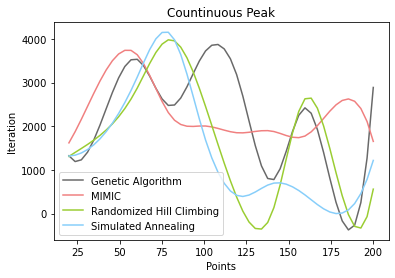

<Figure size 432x288 with 0 Axes>

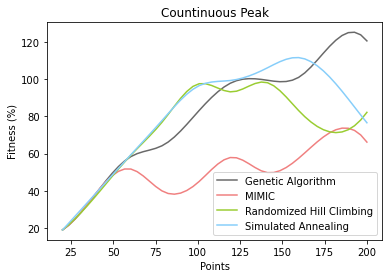

<Figure size 432x288 with 0 Axes>

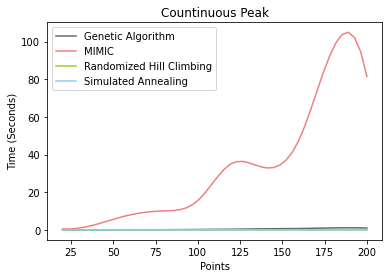

In [21]:
CP_INFILE = ['./CONTPKS/CONTPEAKS_GA_N_0.2N_0.2N_LOG.txt',
             './CONTPKS/CONTPEAKS_GA_N_0.2N_0.5N_LOG.txt',
             './CONTPKS/CONTPEAKS_GA_N_0.5N_0.2N_LOG.txt',
             './CONTPKS/CONTPEAKS_GA_N_0.5N_0.5N_LOG.txt',
             './CONTPKS/CONTPEAKS_MIMIC_N_.5N_0.1_LOG.txt',
             './CONTPKS/CONTPEAKS_MIMIC_N_.5N_0.3_LOG.txt',
             './CONTPKS/CONTPEAKS_MIMIC_N_.5N_0.5_LOG.txt',
             './CONTPKS/CONTPEAKS_MIMIC_N_.5N_0.7_LOG.txt',
             './CONTPKS/CONTPEAKS_MIMIC_N_.5N_0.9_LOG.txt',
             './CONTPKS/CONTPEAKS_RHC_LOG.txt',
             './CONTPKS/CONTPEAKS_SA0.15_LOG.txt',
             './CONTPKS/CONTPEAKS_SA0.35_LOG.txt',
             './CONTPKS/CONTPEAKS_SA0.55_LOG.txt',
             './CONTPKS/CONTPEAKS_SA0.75_LOG.txt',
             './CONTPKS/CONTPEAKS_SA0.95_LOG.txt',]
input_file = [CP_INFILE[1],CP_INFILE[4],CP_INFILE[10],CP_INFILE[11]]
legend = ['Genetic Algorithm', 'MIMIC', 'Randomized Hill Climbing', 'Simulated Annealing']
plotset = {'Points':0,'Timestep':1,'Trial':2,'Iteration':3,'Fitness (%)':4,'Time (Seconds)':5}
Optimization_Title = "Countinuous Peak"
plt.figure(1)
ploting(input_file,'Points','Iteration',Optimization_Title,plotset,legend)
plt.figure(2)
ploting(input_file,'Points','Fitness (%)',Optimization_Title,plotset,legend)
plt.figure(3)
ploting(input_file,'Points','Time (Seconds)',Optimization_Title,plotset,legend)


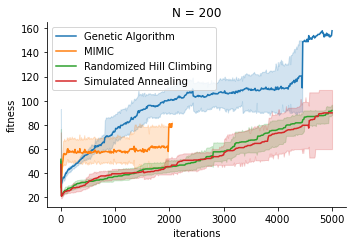

In [24]:
FILES=[CP_INFILE[1],CP_INFILE[4],CP_INFILE[10],CP_INFILE[11]]
legends =['Genetic Algorithm', 'MIMIC', 'Randomized Hill Climbing', 'Simulated Annealing']
df = pd.DataFrame()
i = 0
for file_ in FILES:
    file_df = pd.read_csv(file_,index_col=False, header=0)
    file_df['Algorithm'] = str(legends[i])
    df = df.append(file_df)
    i = i + 1  
df.head() 
df2 = df[df['N'] == 200]
g = sns.relplot(x="iterations", y="fitness", hue="Algorithm",kind="line", data=df2,legend = False)
g.fig.set_size_inches(5,3)
plt.title('N = 200')
plt.legend(legends)

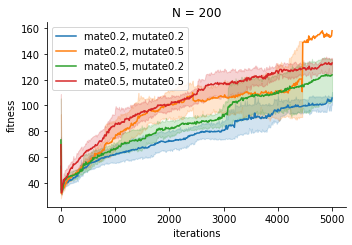

In [25]:
FILES=[CP_INFILE[0],CP_INFILE[1],CP_INFILE[2],CP_INFILE[3]]
legend = ['mate0.2, mutate0.2', 'mate0.2, mutate0.5', 'mate0.5, mutate0.2', 'mate0.5, mutate0.5']
df = pd.DataFrame()
i = 0
for file_ in FILES:
    file_df = pd.read_csv(file_,index_col=False, header=0)
    file_df['Algorithm'] = str(legends[i])
    df = df.append(file_df)
    i = i + 1  
df.head() 
df2 = df[df['N'] == 200]
g = sns.relplot(x="iterations", y="fitness", hue="Algorithm",kind="line", data=df2,legend = False)
g.fig.set_size_inches(5,3)
plt.title('N = 200')
plt.legend(legend)

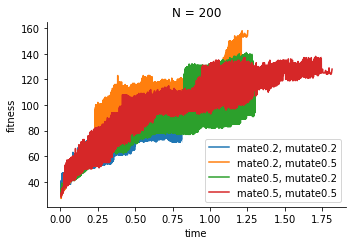

In [26]:
g = sns.relplot(x="time", y="fitness", hue="Algorithm",kind="line", data=df2,legend = False)
g.fig.set_size_inches(5,3)
plt.title('N = 200')
plt.legend(legend)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7201 entries, 15824 to 19011
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   N           7201 non-null   int64  
 1   T           7201 non-null   int64  
 2   trial       7201 non-null   int64  
 3   iterations  7201 non-null   int64  
 4   fitness     7201 non-null   float64
 5   time        7201 non-null   float64
 6   fevals      7201 non-null   int64  
 7   Algorithm   7201 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 506.3+ KB


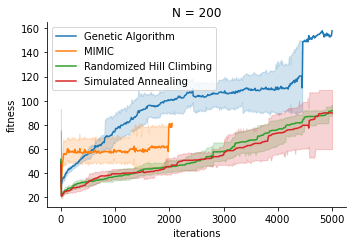

In [27]:
FILES=[CP_INFILE[1],CP_INFILE[4],CP_INFILE[10],CP_INFILE[11]]
legends =['Genetic Algorithm', 'MIMIC', 'Randomized Hill Climbing', 'Simulated Annealing']
df = pd.DataFrame()
i = 0
for file_ in FILES:
    file_df = pd.read_csv(file_,index_col=False, header=0)
    file_df['Algorithm'] = str(legends[i])
    df = df.append(file_df)
    i = i + 1

df.to_csv("Combined.csv", header=False, index=False)    
df.head() 
df2 = df[df['N'] == 200]
df2.info()
df2.describe()
g = sns.relplot(x="iterations", y="fitness", hue="Algorithm",kind="line", data=df2,legend = False)
g.fig.set_size_inches(5,3)
plt.title('N = 200')
plt.legend(legends)


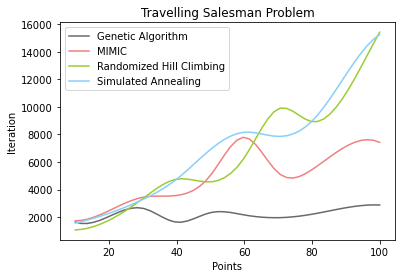

<Figure size 432x288 with 0 Axes>

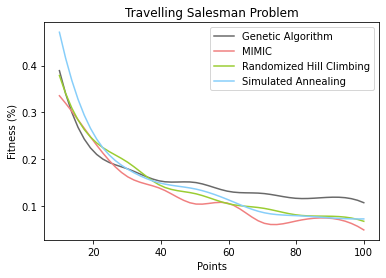

<Figure size 432x288 with 0 Axes>

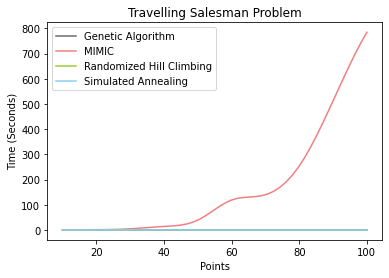

In [28]:
TSP_INFILE = ['./TSP/TSP_GA_N_0.2N_0.2N_LOG.txt',
             './TSP/TSP_GA_N_0.2N_0.5N_LOG.txt',
             './TSP/TSP_GA_N_0.5N_0.2N_LOG.txt',
             './TSP/TSP_GA_N_0.5N_0.5N_LOG.txt',
             './TSP/TSP_MIMIC_N_.5N_0.1_LOG.txt',
             './TSP/TSP_MIMIC_N_.5N_0.3_LOG.txt',
             './TSP/TSP_MIMIC_N_.5N_0.5_LOG.txt',
             './TSP/TSP_MIMIC_N_.5N_0.7_LOG.txt',
             './TSP/TSP_MIMIC_N_.5N_0.9_LOG.txt',
             './TSP/TSP_RHC_LOG.txt',
             './TSP/TSP_SA0.15_LOG.txt',
             './TSP/TSP_SA0.35_LOG.txt',
             './TSP/TSP_SA0.55_LOG.txt',
             './TSP/TSP_SA0.75_LOG.txt',
             './TSP/TSP_SA0.95_LOG.txt',]

input_file = [TSP_INFILE[1],TSP_INFILE[4],TSP_INFILE[9],TSP_INFILE[14]]
plotset = {'Points':0,'Trial':1,'Iteration':2,'Fitness (%)':3,'Time (Seconds)':4}
legend = ['Genetic Algorithm', 'MIMIC', 'Randomized Hill Climbing', 'Simulated Annealing']
Optimization_Title = "Travelling Salesman Problem"
plt.figure(1)
ploting(input_file,'Points','Iteration',Optimization_Title,plotset,legend)
plt.figure(2)
ploting(input_file,'Points','Fitness (%)',Optimization_Title,plotset,legend)
plt.figure(3)
ploting(input_file,'Points','Time (Seconds)',Optimization_Title,plotset,legend)

<ipython-input-29-f29be14e20d0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['N']= df2['N'].astype(str).astype(int)
<ipython-input-29-f29be14e20d0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['iterations'] = df2['iterations'].astype(str).astype(int)
<ipython-input-29-f29be14e20d0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

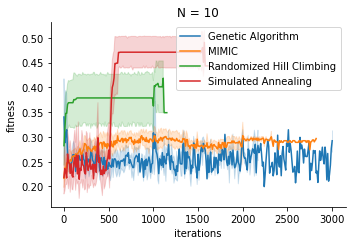

In [29]:

FILES=[TSP_INFILE[1],TSP_INFILE[4],TSP_INFILE[9],TSP_INFILE[14]]
legends =['Genetic Algorithm', 'MIMIC', 'Randomized Hill Climbing', 'Simulated Annealing']
df = pd.DataFrame()
i = 0
for file_ in FILES:
    file_df = pd.read_csv(file_,index_col=False, header=0)
    file_df['Algorithm'] = str(legends[i])
    df = df.append(file_df)
    i = i + 1
df.head() 
df2 = df[df["N"] != "N"]
df2['N']= df2['N'].astype(str).astype(int)
df2['iterations'] = df2['iterations'].astype(str).astype(int)
df2['fitness'] = df2['fitness'].astype(str).astype(float)
df3 = df2[df2['N'] == 10]
df3.describe()
g = sns.relplot(x="iterations", y="fitness", hue="Algorithm",kind="line", data = df3,legend = False)
g.fig.set_size_inches(5,3)
plt.title('N = 10')
plt.legend(legends)


<ipython-input-30-5f6ae6808ad1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['N']= df2['N'].astype(str).astype(int)
<ipython-input-30-5f6ae6808ad1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['iterations'] = df2['iterations'].astype(str).astype(int)
<ipython-input-30-5f6ae6808ad1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180716 entries, 0 to 35800
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   N           180716 non-null  int64  
 1   trial       180716 non-null  object 
 2   iterations  180716 non-null  int64  
 3   fitness     180716 non-null  float64
 4   time        180716 non-null  float64
 5   fevals      180716 non-null  object 
 6   Algorithm   180716 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


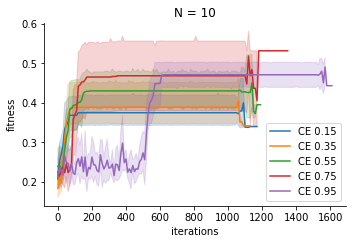

In [30]:
FILES = [TSP_INFILE[10],TSP_INFILE[11],TSP_INFILE[12],TSP_INFILE[13],TSP_INFILE[14]]
legend = ['CE 0.15', 'CE 0.35', 'CE 0.55', 'CE 0.75','CE 0.95']
df = pd.DataFrame()
i = 0
for file_ in FILES:
    file_df = pd.read_csv(file_,index_col=False, header=0)
    file_df['Algorithm'] = str(legend[i])
    df = df.append(file_df)
    i = i + 1
df.head() 
df2 = df[df["N"] != "N"]
df2['N']= df2['N'].astype(str).astype(int)
df2['iterations'] = df2['iterations'].astype(str).astype(int)
df2['fitness'] = df2['fitness'].astype(str).astype(float)
df2['time'] = df2['time'].astype(str).astype(float)
df2.info()
df3 = df2[df2['N'] == 10]
g = sns.relplot(x="iterations", y="fitness", hue="Algorithm",kind="line", data = df3,legend = False)
g.fig.set_size_inches(5,3)
plt.title('N = 10')
plt.legend(legend)

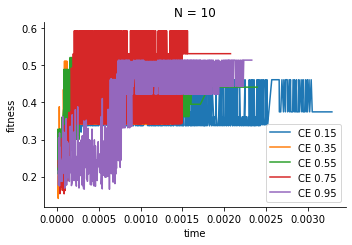

In [31]:
g = sns.relplot(x="time", y="fitness", hue="Algorithm",kind="line", data=df3,legend = False)
g.fig.set_size_inches(5,3)
plt.title('N = 10')
plt.legend(legend)

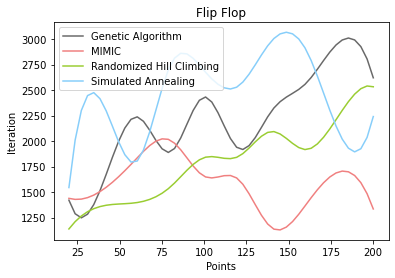

<Figure size 432x288 with 0 Axes>

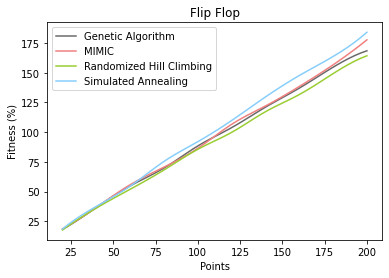

<Figure size 432x288 with 0 Axes>

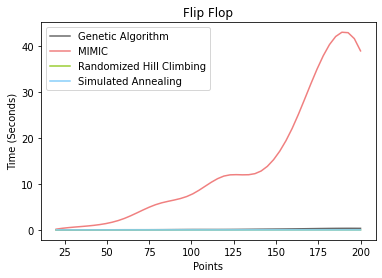

In [32]:
FF_INFILE = ['./FLIPFLOP/FLIPFLOP_GA_N_0.2N_0.2N_LOG.txt',
             './FLIPFLOP/FLIPFLOP_GA_N_0.2N_0.5N_LOG.txt',
             './FLIPFLOP/FLIPFLOP_GA_N_0.5N_0.2N_LOG.txt',
             './FLIPFLOP/FLIPFLOP_GA_N_0.5N_0.5N_LOG.txt',
             './FLIPFLOP/FLIPFLOP_MIMIC_N_.5N_0.1_LOG.txt',
             './FLIPFLOP/FLIPFLOP_MIMIC_N_.5N_0.3_LOG.txt',
             './FLIPFLOP/FLIPFLOP_MIMIC_N_.5N_0.5_LOG.txt',
             './FLIPFLOP/FLIPFLOP_MIMIC_N_.5N_0.7_LOG.txt',
             './FLIPFLOP/FLIPFLOP_MIMIC_N_.5N_0.9_LOG.txt',
             './FLIPFLOP/FLIPFLOP_RHC_LOG.txt',
             './FLIPFLOP/FLIPFLOP_SA0.15_LOG.txt',
             './FLIPFLOP/FLIPFLOP_SA0.35_LOG.txt',
             './FLIPFLOP/FLIPFLOP_SA0.55_LOG.txt',
             './FLIPFLOP/FLIPFLOP_SA0.75_LOG.txt',
             './FLIPFLOP/FLIPFLOP_SA0.95_LOG.txt',]
input_file = [FF_INFILE[2],FF_INFILE[5],FF_INFILE[10],FF_INFILE[13]]
legend = ['Genetic Algorithm', 'MIMIC', 'Randomized Hill Climbing', 'Simulated Annealing']
plotset = {'Points':0,'Trial':1,'Iteration':2,'Fitness (%)':3,'Time (Seconds)':4}
Optimization_Title = "Flip Flop"
plt.figure(1)
ploting(input_file,'Points','Iteration',Optimization_Title,plotset,legend)
plt.figure(2)
ploting(input_file,'Points','Fitness (%)',Optimization_Title,plotset,legend)
plt.figure(3)
ploting(input_file,'Points','Time (Seconds)',Optimization_Title,plotset,legend)

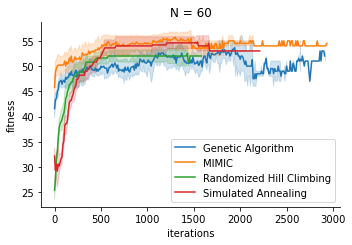

In [33]:
FILES = [FF_INFILE[2],FF_INFILE[5],FF_INFILE[10],FF_INFILE[13]]
legends =['Genetic Algorithm', 'MIMIC', 'Randomized Hill Climbing', 'Simulated Annealing']
df = pd.DataFrame()
i = 0
for file_ in FILES:
    file_df = pd.read_csv(file_,index_col=False, header=0)
    file_df['Algorithm'] = str(legends[i])
    df = df.append(file_df)
    i = i + 1
df2 = df[df['N'] == 60]
g = sns.relplot(x="iterations", y="fitness", hue="Algorithm",kind="line", data=df2,legend = False)
g.fig.set_size_inches(5,3)
plt.title('N = 60')
plt.legend(legends)

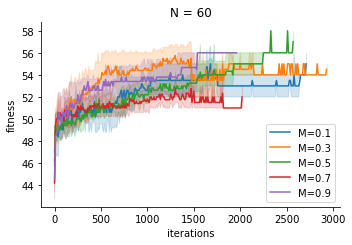

In [34]:
FILES = [FF_INFILE[4],FF_INFILE[5],FF_INFILE[6],FF_INFILE[7],FF_INFILE[8]]
legend = ['M=0.1', 'M=0.3', 'M=0.5', 'M=0.7','M=0.9' ]
df = pd.DataFrame()
i = 0
for file_ in FILES:
    file_df = pd.read_csv(file_,index_col=False, header=0)
    file_df['Algorithm'] = str(legend[i])
    df = df.append(file_df)
    i = i + 1
df2 = df[df['N'] == 60]
g = sns.relplot(x="iterations", y="fitness", hue="Algorithm",kind="line", data=df2,legend = False)
g.fig.set_size_inches(5,3)
plt.title('N = 60')
plt.legend(legend)

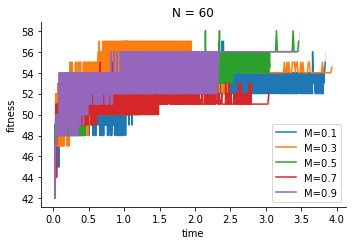

In [35]:
g = sns.relplot(x="time", y="fitness", hue="Algorithm",kind="line", data=df2,legend = False)
g.fig.set_size_inches(5,3)
plt.title('N = 60')
plt.legend(legend)